In [1]:
from IPython.display import clear_output
from ipywidgets import Output

In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKerasTF
from tqdm.keras import TqdmCallback

print(tf.__version__)

2.10.1


In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [4]:
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

(img_rows, img_cols) = (train_images.shape[1], train_images.shape[2])
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 3)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 3)

input_shape = (img_rows, img_cols, 3)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

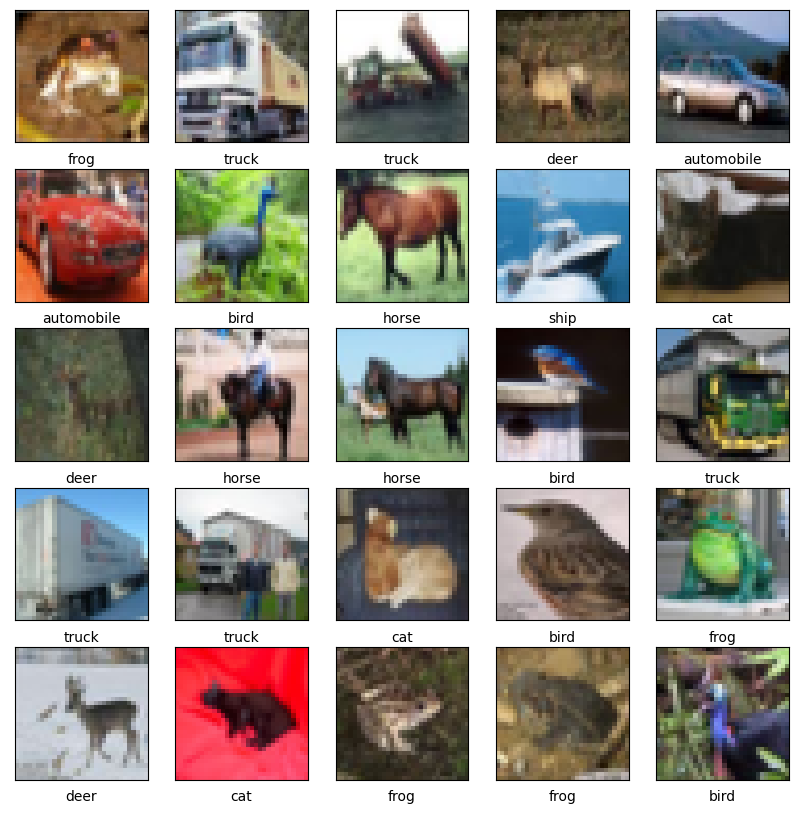

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(100, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 100)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 120)               2700120   
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                        

In [10]:
PLOT_CONTEXT = Output()
display(PLOT_CONTEXT)

from livelossplot.inputs.tf_keras import PlotLossesCallback
from typing import Dict
class PLK(PlotLossesCallback):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def on_epoch_end(self, epoch: int, logs: Dict[str, float]):
        with PLOT_CONTEXT:
            super().on_epoch_end(epoch, logs)

Output()

In [11]:
history = model.fit(train_images, train_labels,
          batch_size=64,
          epochs=20,
          verbose=0,
          validation_split=0.1,
          callbacks=[PLK(), TqdmCallback()])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2234245538711548
Test accuracy: 0.566100001335144


In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img, class_names=class_names):
    if class_names == None:
        class_names = range(len(predictions_array))
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

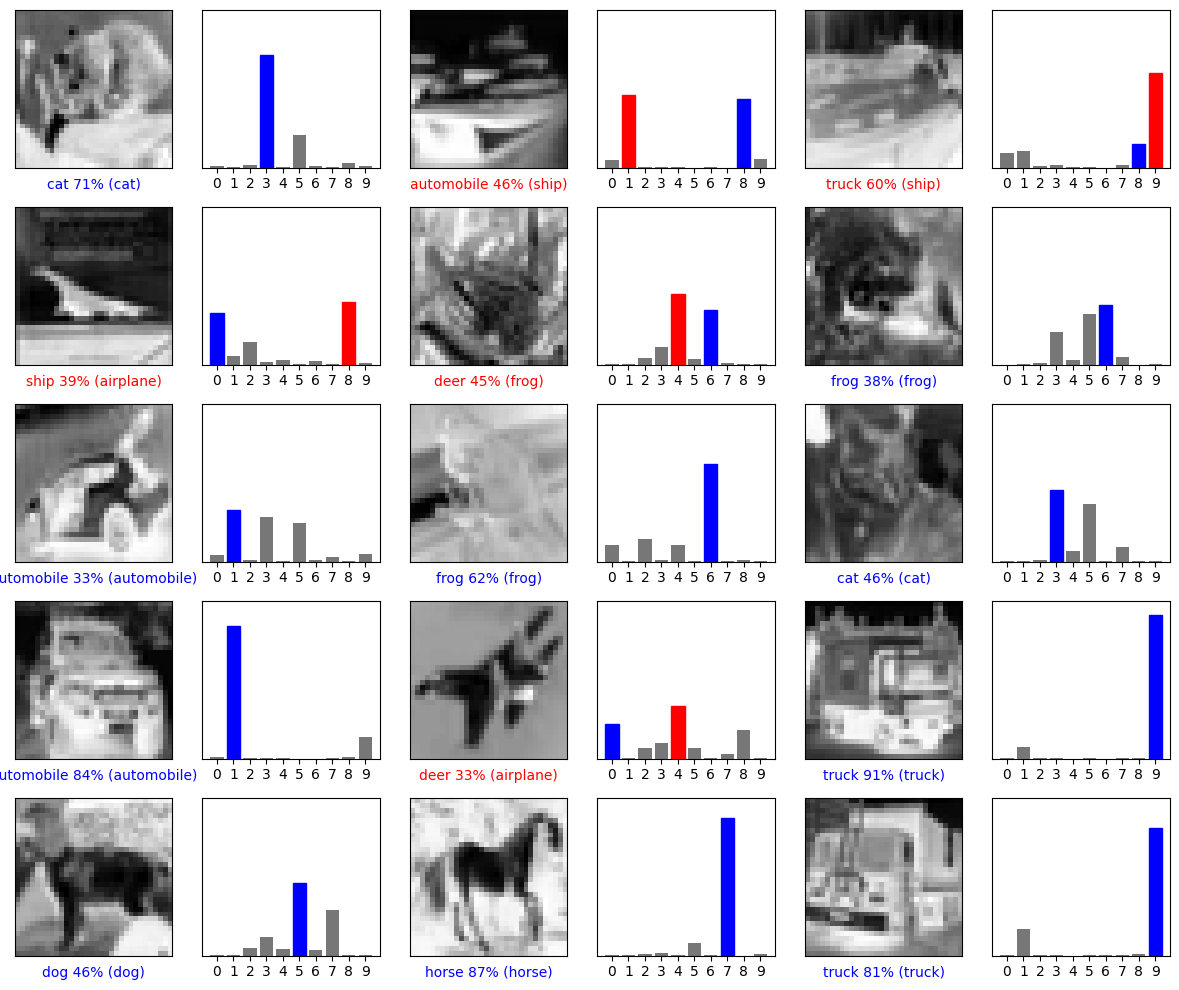

In [15]:
# prédictions correctes en bleu, incorrectes en rouge
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images[:,:,:,0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()